# Data Reading

In [3]:
import pandas as pd

account_filename = 'data/accountData.csv'
customer_filename = 'data/customerData.csv'
transaction_filename = 'data/transactionData.csv'
labels_filename = 'data/labelledData_15.csv'

In [4]:
accounts = pd.read_csv(account_filename)

In [5]:
customers = pd.read_csv(customer_filename)

In [6]:
transactions = pd.read_csv(transaction_filename)

In [7]:
labels = pd.read_csv(labels_filename)

# Data Exploration

In [23]:
accounts.head()

,ACCOUNT_ID,CUSTOMER_ID,ACCOUNT_DATE_TIME,ACCOUNT_TYPE,ACCOUNT_BALANCE
0,0,0,2016-05-02 03:04:27,basic checkings account,2940588.03
1,1,0,2016-12-25 08:57:37,savings account,14447151.31
2,2,1,2016-12-10 08:43:49,interest checking account,2216088.67
3,3,2,2016-11-24 11:46:26,basic checkings account,3942658.09
4,4,3,2016-01-15 05:31:45,certificates of deposit,10206951.48


In [ ]:
accounts.groupby('ACCOUNT_TYPE').groups

In [27]:
customers.head()

,CUSTOMER_ID,CUSTOMER_TYPE,COUNTRY,CUSTOMER_RISK_SCORE
0,0,Individual,US,0.52
1,1,Individual,US,0.09
2,2,Individual,US,0.26
3,3,Individual,US,0.18
4,4,Individual,US,0.34


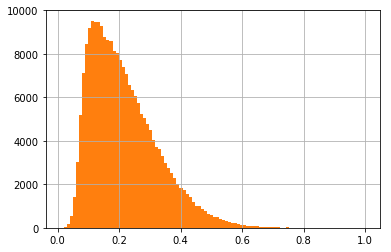

In [12]:
customers.groupby('CUSTOMER_TYPE')['CUSTOMER_RISK_SCORE'].hist(bins=100);

In [31]:
transactions.head()

,TRANSACTION_ID,ORIGIN_CUSTOMER_ID,ORIGIN_ACCOUNT_ID,TRANSACTION_DATE_TIME,TRANSACTION_TYPE,TRANSACTION_SOURCE,TRANSACTION_AMOUNT,BENEFICIARY_CUSTOMER_ID,BENEFICIARY_ACCOUNT_ID
0,0,202950.0,431495.0,2017-01-10 19:21:37,charge,online,508.93,NaN,NaN
1,1,167227.0,355712.0,2017-01-05 12:56:57,withdrawal,atm,20.04,NaN,NaN
2,2,50445.0,107161.0,2017-01-05 21:08:46,charge,online,79.50,NaN,NaN
3,3,102321.0,217511.0,2017-01-09 02:30:10,electronic transfer,ach debit,138.39,1083.0,2287.0
4,4,219263.0,466263.0,2017-01-26 04:12:36,pos,merchant location,695.75,NaN,NaN


In [52]:
pos_labels = labels[labels['Class'] == 1]
neg_labels = labels[labels['Class'] == 0]
print(len(pos_labels))
print(len(neg_labels))

6309
15765926


# Data Visualization

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [39]:
transactions.groupby('TRANSACTION_TYPE')['TRANSACTION_AMOUNT'].mean()

TRANSACTION_TYPE
charge                 8794.718002
deposit                  26.244725
electronic transfer    8765.544732
paper transfer         8857.482060
pos                    8790.163424
withdrawal               20.181326
Name: TRANSACTION_AMOUNT, dtype: float64

# Data Preprocessing

In [53]:
transactions.columns

Index(['TRANSACTION_ID', 'ORIGIN_CUSTOMER_ID', 'ORIGIN_ACCOUNT_ID',
       'TRANSACTION_DATE_TIME', 'TRANSACTION_TYPE', 'TRANSACTION_SOURCE',
       'TRANSACTION_AMOUNT', 'BENEFICIARY_CUSTOMER_ID',
       'BENEFICIARY_ACCOUNT_ID'],
      dtype='object')

In [ ]:
# group transactions by 'original_customer_id', and extact 'ORIGIN_ACCOUNT_ID', 'TRANSACTION_TYPE', 'TRANSACTION_SOURCE',
# and 'TRANSACTION_AMOUNT'

In [ ]:
# for each customer, make a stream of lists(acct, tran_type, tran_source, tran_amt) 
# describing each transaction indexed by transaction time

# customer + account ? 

In [ ]:
# apply pca and clustering to customers' streams

In [ ]:
# find suspicious transaction as outliers of all clusters

In [ ]:
# train an autoencoder based on the clusters

In [ ]:
# use the reconstruction error to find money-laundering transactions

# Initial Analysis with Customer Risk Score

In [13]:
customers.describe()

,CUSTOMER_ID,CUSTOMER_RISK_SCORE
count,250000.000000,250000.000000
mean,124999.500000,0.213565
std,72168.927986,0.110490
min,0.000000,0.010000
25%,62499.750000,0.130000
50%,124999.500000,0.190000
75%,187499.250000,0.280000
max,249999.000000,1.000000


In [32]:
print(len(customers[customers['CUSTOMER_RISK_SCORE'] > 0.47]))
print(sum(labels['Class']))

6437
6309


In [36]:
# label all transactions with high customer risk score (either sender or receiver) over a adjustable threshold
risk_scores = transactions.merge(customers, left_on='ORIGIN_CUSTOMER_ID', right_on='CUSTOMER_ID', how='left')['CUSTOMER_RISK_SCORE']

In [55]:
pred = risk_scores > 0.71
print(sum(pred))

6294


In [51]:
print(len(labels['Class']))
print(len(pred))

15772235
15772235


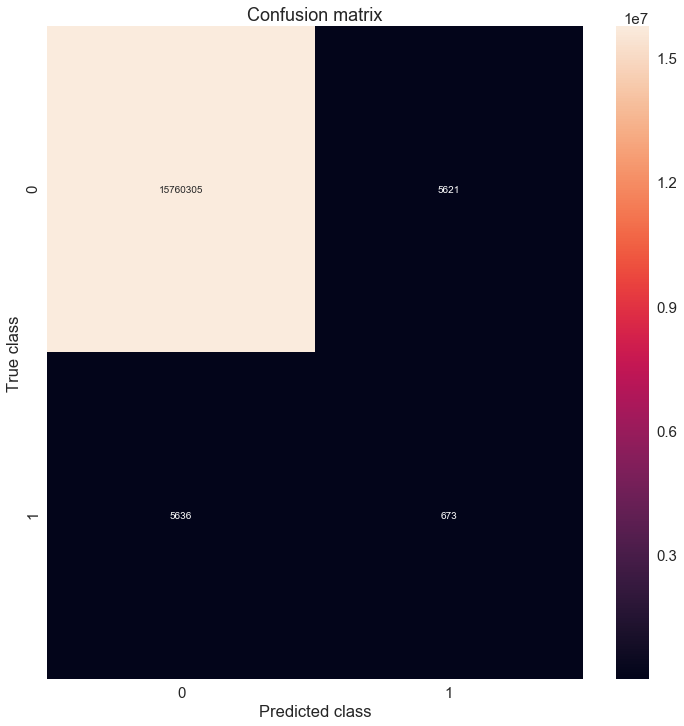

In [56]:
# Then draw the confusion matrix with ground true labels, adjust the threshold to get the best possible combination of 
# false positives and false negatives
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
%matplotlib inline

conf_matrix = confusion_matrix(labels['Class'], pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=[0, 1], yticklabels=[0, 1], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()